# Mathematik für Biologiestudierende

Wintersemester 2025/26

17.12.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

# Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

# Themen heute

* Mann-Whitney-U-Test
* Rangtests

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd
from scipy import stats

# Poweranalyse 

* Man kann aus einem einseitigen unteren Test einen einseitigen oberen machen, indem man die beiden Datensätze vertauscht; umgekehrt natürlich auch.
* Manchmal ist das sogar notwendig.

#### Beispiel Ertragssteigerung

* Durch Bodenverbesserung soll der Ertrag beim Gemüseanbau gesteigert werden
* Die Zufallsvariablen $X_1, ..., X_{n_1}$ geben den Ertrag auf unbearbeitem Boden an und $Y_1, ..., Y_{n_2}$ den auf bearbeitetem.
* $\mu_1$ ist der Erwartungswert für den Ertrag auf unbearbeitetem Boden, $\mu_2$ für den auf bearbeitetem 

* Die Nullhypothese ist $H_0 = \{\mu_1 \ge \mu_2\}$.  Es handelt sich also um einen einseitigen unteren Test.

* Die Poweranalyse funktioniert aber nur für obere Tests.

* Wir bezeichnen also mit $M_1$ den Erwartungswert für den Ertrag auf behandeltem Boden und mit $M_2$ den anderen.
* Dann ist die Nullhypothese $H_0 = \{M_1 \le M_2\}$ und wir haben einen einseitigen oberen Test.

* Wir planen für das Signifikanzniveau $\alpha=0.03$ und eine Effektstärke von 0.3, also einen geringen bis mittleren Effekt.

In [2]:
import statsmodels.stats.power as smp  

In [3]:
poweranalyse = smp.TTestIndPower() 

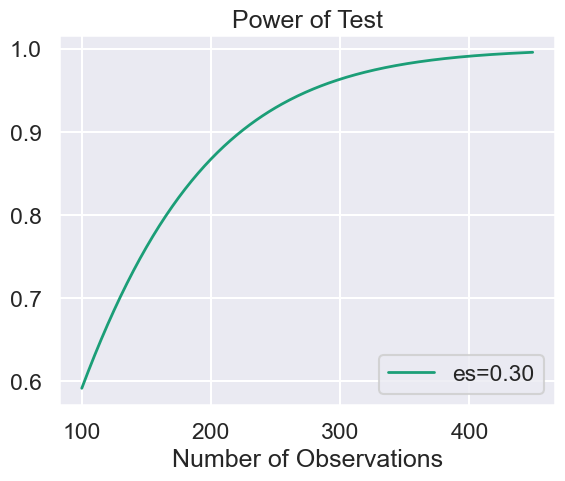

In [4]:
poweranalyse.plot_power(effect_size=[0.3], alpha=0.03, nobs=np.arange(100,450), alternative='larger');

## Vergleich zweier Erwartungswerte bzw. zweier Mediane

|Vergeich                 | parametrisch                        |   nicht-parametrisch | was wird verglichen |
|-------------------------|-------------------------------------|----------------------|---------------------|
|mit Referenzwert         | t-Test für verbundene Stichproben   | Wilcoxon-Test        | Erwartungswert      |
|vorher-nachher           | t-Test für verbundene Stichproben   | Wilcoxon-Test        | Median              |
|verschiedene Populationen| t-Test für unverbundene Stichproben | Mann-Whitney-U-Test  | Median              |

# Mann-Whitney-U-Test

Den Mann-Whitney Test verwendet man zum Vergleich der Mediane unverbundener Datensätze, wenn die Normalverteilungsannahme nicht gesichert ist

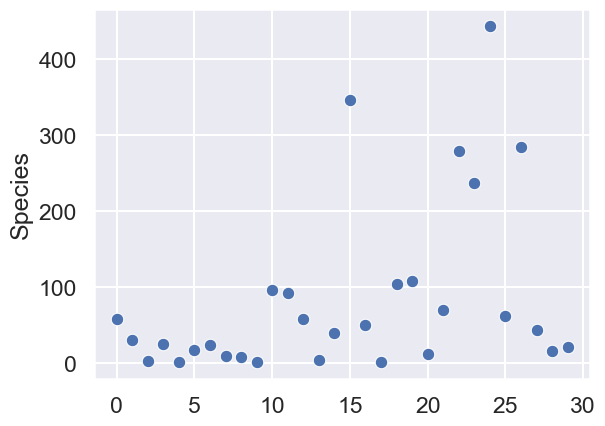

In [5]:
galapagos = pd.read_csv("https://www.math.uni-duesseldorf.de/~braun/bio2526/galapagos.csv")
sns.scatterplot(galapagos.Species);

* Es gibt also 5 Inseln, die eine sehr viel reichhaltigere Fauna als die anderen haben
* Sind das die großen Inseln?

* Alternativhypothese:  Inseln mit reichhaltiger Fauna sind größer als die anderen
* Prüfen wir mit Mann-Whitney-U-Test

In [6]:
reich = galapagos[galapagos.Species>=150]
arm = galapagos[galapagos.Species<150]

In [7]:
reich.describe()

,Species,Area,Elevation,Nearest,Scruz,Adjacent
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,318.60000,1373.602000,966.600000,9.860000,32.740000,128.114000
std,80.32621,1860.550153,427.743849,19.777462,25.876205,283.079535
min,237.00000,170.920000,640.000000,0.200000,0.000000,0.100000
25%,280.00000,551.620000,716.000000,0.600000,19.800000,0.520000
50%,285.00000,572.330000,864.000000,0.700000,28.100000,0.570000
75%,347.00000,903.820000,906.000000,2.600000,49.200000,4.890000
max,444.00000,4669.320000,1707.000000,45.200000,66.600000,634.490000


In [8]:
arm.describe()

,Species,Area,Elevation,Nearest,Scruz,Adjacent
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,38.560000,39.330000,248.320000,10.100000,61.824000,287.695200
std,34.467473,127.392845,307.762046,13.454182,73.035592,940.916069
min,2.000000,0.010000,25.000000,0.400000,0.400000,0.030000
25%,10.000000,0.210000,93.000000,1.100000,10.700000,0.520000
50%,25.000000,1.240000,147.000000,4.300000,47.400000,2.850000
75%,58.000000,17.950000,259.000000,10.700000,88.300000,59.560000
max,108.000000,634.490000,1494.000000,47.400000,290.200000,4669.320000


Nicht-parametrischer Test aus zwei Gründen erforderlich

* Normalverteilungsannahmen verletzt
* eine der beiden Gruppen hat nur 5 Elemente

In [9]:
res = stats.mannwhitneyu(reich.Area, arm.Area, alternative='greater')
res

MannwhitneyuResult(statistic=122.0, pvalue=0.0005123847398218562)

# Effektstärke beim Mann-Whitney-U-Test

* die Teststatistik des Mann-Whitney-U-Tests wird mit U bezeichnet
* die beiden Stichprobenumfänge sind $n_1$ und $n_2$

Die Formel für die Effektstärke nach Cohen's&nbsp;r ist
$$  r = \left| 1 - \frac{2U}{n_1 \cdot n_2} \right|
$$

In [10]:
U = res.statistic
n1 = 5
n2 = 25
r = 1 - 2*U/(n1*n2)
r

-0.952

Also $r = 0.952$

### Interpretation der Effektstärke für Cohen's r

| r-Wert | Interpretation   |
|--------|------------------|
| 0.1    | geringer Effekt  |
| 0.3    | mittlerer Effekt |
| 0.5    | starker Effekt   |

Also ein sehr starker Effekt

Dieselbe Frage, aber als unterer Test:

In [11]:
stats.mannwhitneyu(arm.Area, reich.Area, alternative='less')

MannwhitneyuResult(statistic=3.0, pvalue=0.0005123847398218562)

Jetzt also $U=3$

In [12]:
U = 3
n1 = 25
n2 = 5

In [13]:
r = 1 - 2*U/(n1*n2)
r

0.952

# Rangtests

* Wilcoxon und Mann-Whitney sind Rangtests:

* die Daten werden geordnet
* die Ränge der Elemente der beiden Gruppen werden jeweils addiert

* aus diesen Rangsummen werden die Teststatistiken berechnet

* kleiner Unterschied der Rangsummen bedeuten kleine Unterschiede der Daten und daher Beibehaltung der Nullhypothese

In [14]:
galapagos['Rang'] = galapagos.Area.rank()
galapagos.head()

,Island,Species,Area,Elevation,Nearest,Scruz,Adjacent,Rang
0,Baltra,58,25.09,346,0.6,0.6,1.84,21.0
1,Bartolome,31,1.24,109,0.6,26.3,572.33,12.5
2,Caldwell,3,0.21,114,2.8,58.7,0.78,7.0
3,Champion,25,0.10,46,1.9,47.4,0.18,5.0
4,Coamano,2,0.05,77,1.9,1.9,903.82,3.0


In [15]:
reich = galapagos[galapagos.Species>=150]
arm = galapagos[galapagos.Species<150]

In [16]:
T1 = arm.Rang.sum()  #  T1 gehört zu n1 = 25
T1

328.0

In [17]:
T2 = reich.Rang.sum()
T2

137.0

In [18]:
U1 = n1*n2 + n1*(n1+1)/2 - T1
U1

122.0

In [19]:
U2 = n1*n2 + n2*(n2+1)/2 - T2
U2

3.0

* Wie man daraus den p-Wert bestimmt, ist nicht unser Thema
* jedenfalls gibt es zwei Möglichkeiten
  * eine exakte
  * eine approximative, welche die Verteilung von U durch eine Normalverteilung approximiert
  * `stats.mannwhitneyu` trifft diese Entscheidung automatisch

* Wichtig:  Die tatsächlichen Werte für die Flächen der Inseln sind in die Berechnung der Teststatistik nicht eingegangen
* eingegangen ist nur die Reihenfolge

## konservative Tests

* Der $t$-Test verwendet eine Verteilungsannahme:  Daten müssen normalverteilt sein
* Tests, die auch bei Verletzung der Verteilungsannahmen noch gute Ergebnisse liefern, heißen *konservativ*
* Der $t$-Test ist konservativ